In [3]:
# Librerias
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ruta de archivo 
ruta_archivo = 'ObesityDataSet_raw_and_data_sinthetic.csv'

data = pd.read_csv(ruta_archivo)

In [5]:
# Imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12 

In [6]:
# Primeras filas del conjunto de datos
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
# Estadísticas descriptivas
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [8]:
# El dataset esta limpio, no hay datos nulos. Se decide seleccionar el atributo FAVC (Do you eat high caloric food frequently?)
# Este atributo tiene datos entre 1 y 3, donde 1 es consume poco este tipo de alimentos y 3 es mucho.
# Existen estudios que respaldan la idea del consumo de alimentos altos en calorias con la obesidad
# https://www.nhlbi.nih.gov/es/salud/sobrepeso-y-obesidad/causas
# https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1665-11462006000300006

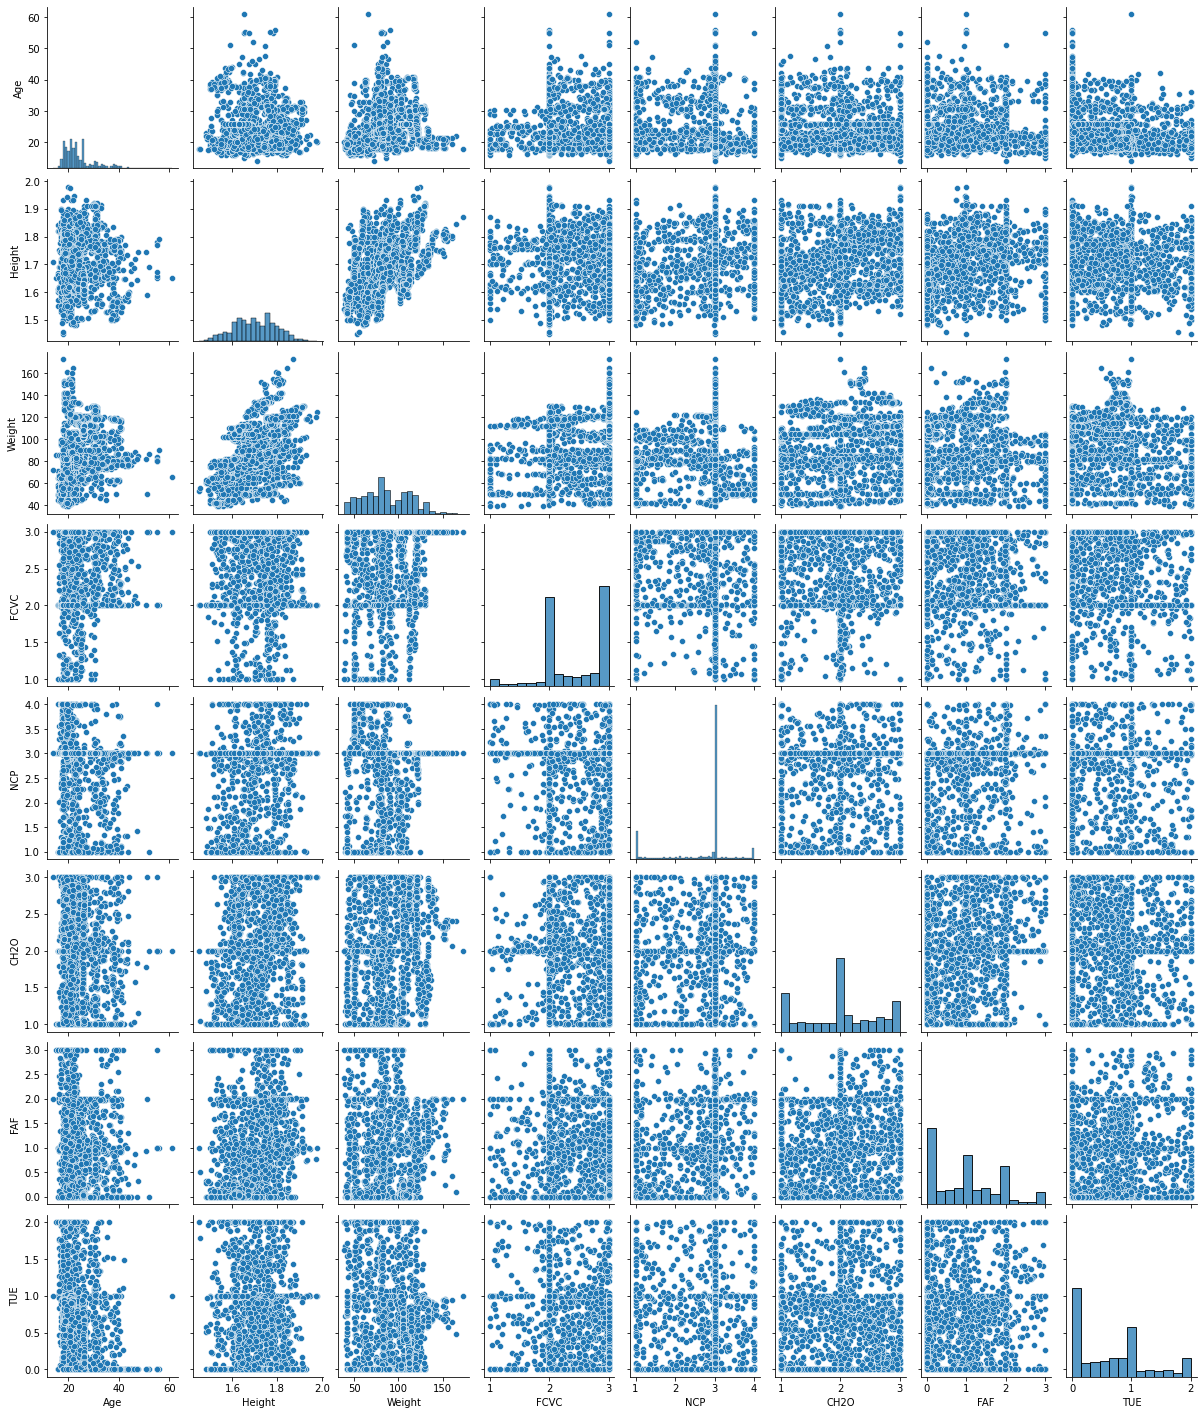

In [9]:
sns.pairplot(data, aspect=.85)

In [10]:
data.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


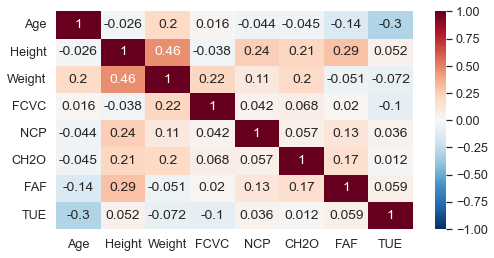

In [11]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), 
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1);

# Selección de variables
Se han seleccionado las variables FAF (frecuencia actividad fisica) y NCP (número de comidas al día). 
Esto debido a que la relación entre estas variables puede ayudar a entender mejor la obesidad, pues representan tanto
la variable alimentación como la variable física.

Text(0, 0.5, 'NCP')

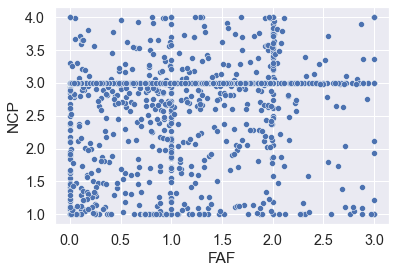

In [13]:
sns.set(font_scale=1.3)
sns.scatterplot(x = 'FAF', 
                y = 'NCP', 
                data=data)
plt.xlabel('FAF')
plt.ylabel('NCP')

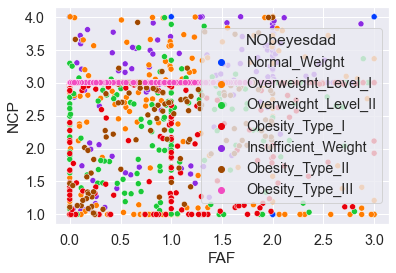

In [14]:
sns.scatterplot(x = 'FAF',
                y = 'NCP', 
                data=data,
                palette='bright',
                hue='NObeyesdad');

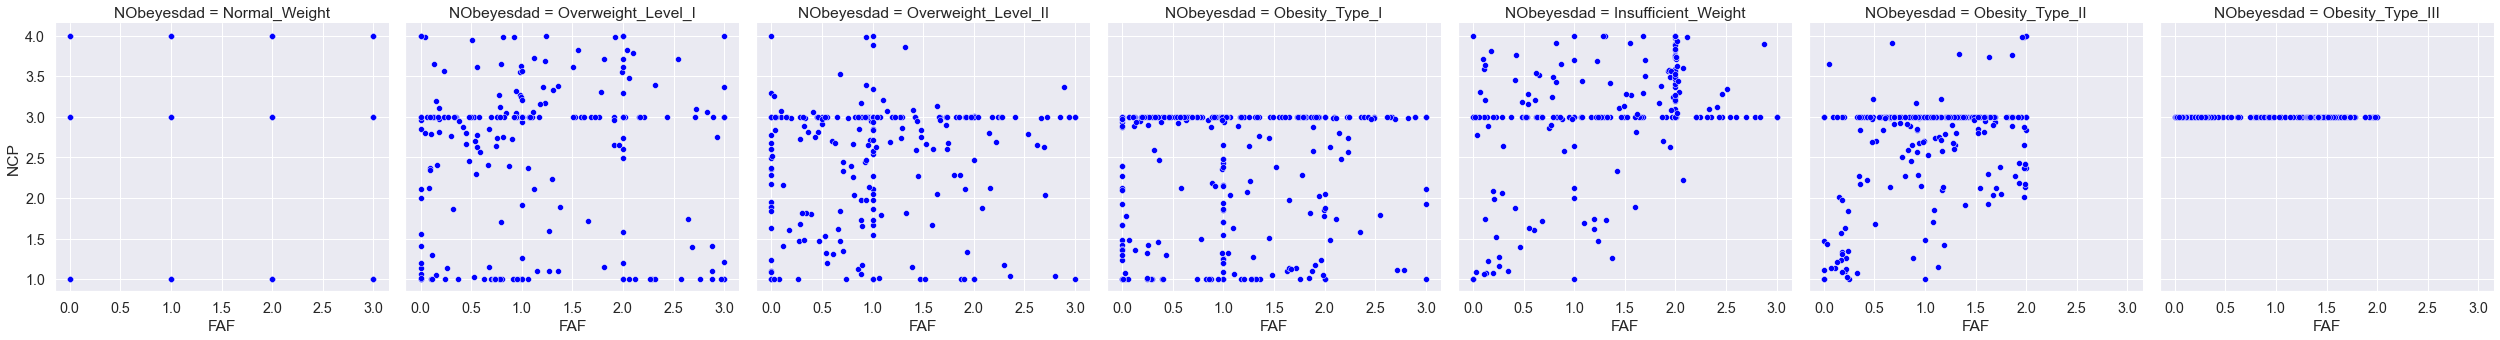

In [15]:
sns.relplot(x='FAF', 
            y='NCP', 
            data=data, 
            kind='scatter', 
            col='NObeyesdad',
            color='blue');

<AxesSubplot:xlabel='FAF', ylabel='NCP'>

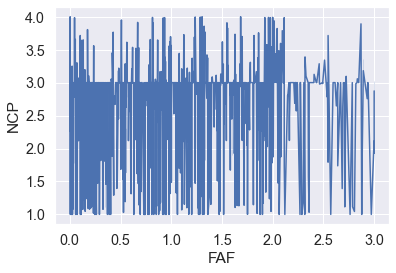

In [16]:
sns.lineplot(x="FAF", 
             y="NCP",
             data=data)

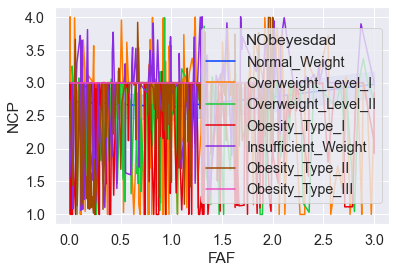

In [17]:
sns.lineplot(x="FAF", 
             y="NCP",
             data=data,
             palette='bright',
             hue='NObeyesdad');

# Análisis

El análisis bivariado muestra una correlación de 0.13, indica que hay una leve tendencia de que, al aumentar una variable, la otra también aumente, pero la relación no es fuerte. Lo que se podría considerar una dieta normal de tres comidas es la única cifra que muestra una relación constante con un nivel de obesidad intermedio (obesidad tipo 3). Los demás gráficos no muestran algún patrón llamativo.
Estos hallazgos son consistentes con la literatura existente sobre la relación entre actividad física y obesidad. Sin embargo, es importante considerar que factores adicionales, como la dieta y el metabolismo, también pueden influir en esta relación.